# **Model Evaluation**

## Objectives

* Load the already processed dataset.
* Split the data into training and testing sets.
* Train the model.

## Inputs

* balanced_mountains_vs_beaches_preferences.csv is the processed data - processed in the previous 04_Feature_Engineering notebook.

## Outputs

* A trained model that can predict whether a person prefers mountains or beaches.

## Additional Comments

* Please select Python 3.8.18 for the kernel of this notebook.
* This notebook was inspired by the Churnometer walkthrough project.
* ML operations are inspired by Orhan Serçe - under this link: https://www.kaggle.com/code/orhansere/mountains-vs-beaches-smote-classification



---

Import all the necessary packages

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

data_path = "../outputs/datasets/processed/balanced_mountains_vs_beaches_preferences.csv"
df = pd.read_csv(data_path)


Separating the features and the target variable.

In [2]:
X = df.drop('Preference', axis=1)
y = df['Preference']

Split the data into training and testing sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=717)


Apply the pipeline

In [4]:
pipelines = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())]),
    'Decision Tree': Pipeline([('model', DecisionTreeClassifier())]),
    'Gradient Boosting': Pipeline([('model', GradientBoostingClassifier())]),
    'Random Forest': Pipeline([('model', RandomForestClassifier())]),
    'Naive Bayes': Pipeline([('scaler', StandardScaler()), ('model', GaussianNB())])
}


Cross validate the Pipelines and print out the mean accuracy.

In [5]:
from sklearn.model_selection import cross_val_score

for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression - Cross-validation accuracy: 0.8981 ± 0.0035
Decision Tree - Cross-validation accuracy: 0.9951 ± 0.0006
Gradient Boosting - Cross-validation accuracy: 0.9947 ± 0.0009
Random Forest - Cross-validation accuracy: 0.9947 ± 0.0007
Naive Bayes - Cross-validation accuracy: 0.9245 ± 0.0028


A function to evaluate the model accuracy by fitting it on the train data.


Logistic Regression Model Accuracy: 0.8983
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9890
           1       0.81      0.77      0.79      3221

    accuracy                           0.90     13111
   macro avg       0.87      0.86      0.86     13111
weighted avg       0.90      0.90      0.90     13111



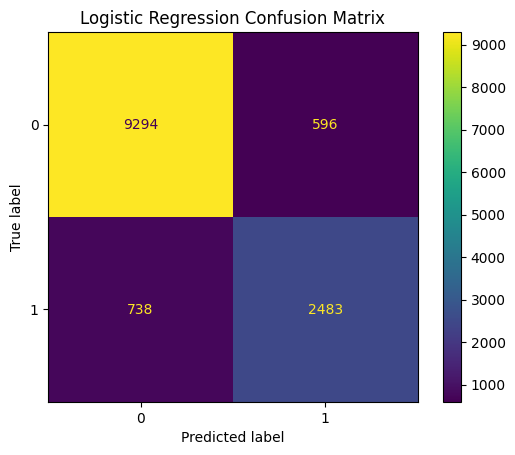


Decision Tree Model Accuracy: 0.9960
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9890
           1       0.99      0.99      0.99      3221

    accuracy                           1.00     13111
   macro avg       0.99      1.00      0.99     13111
weighted avg       1.00      1.00      1.00     13111



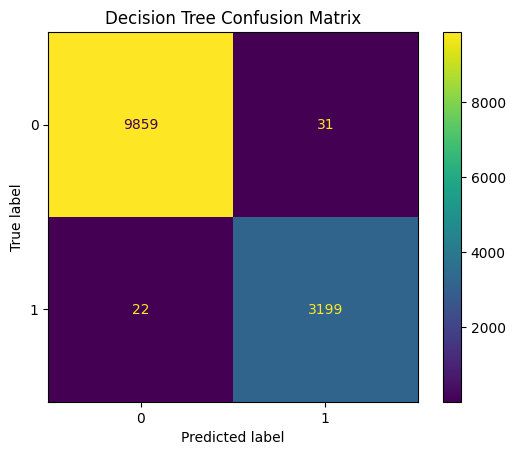


Gradient Boosting Model Accuracy: 0.9960
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9890
           1       1.00      0.99      0.99      3221

    accuracy                           1.00     13111
   macro avg       1.00      0.99      0.99     13111
weighted avg       1.00      1.00      1.00     13111



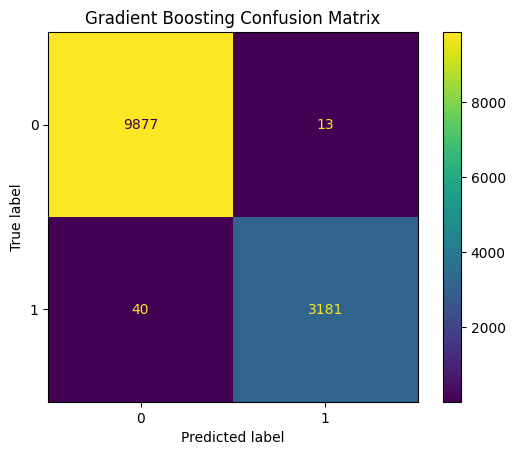


Random Forest Model Accuracy: 0.9953
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9890
           1       1.00      0.99      0.99      3221

    accuracy                           1.00     13111
   macro avg       1.00      0.99      0.99     13111
weighted avg       1.00      1.00      1.00     13111



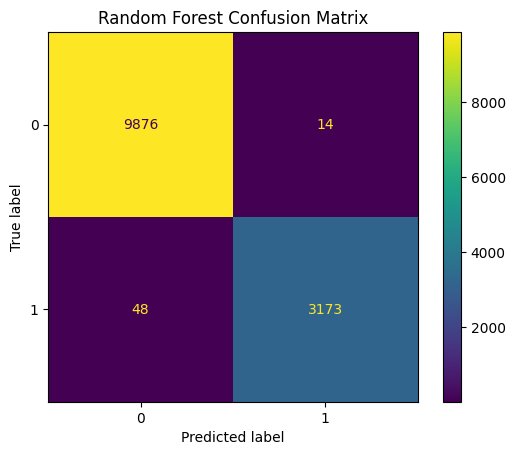


Naive Bayes Model Accuracy: 0.9250
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9890
           1       0.93      0.75      0.83      3221

    accuracy                           0.93     13111
   macro avg       0.93      0.87      0.89     13111
weighted avg       0.93      0.93      0.92     13111



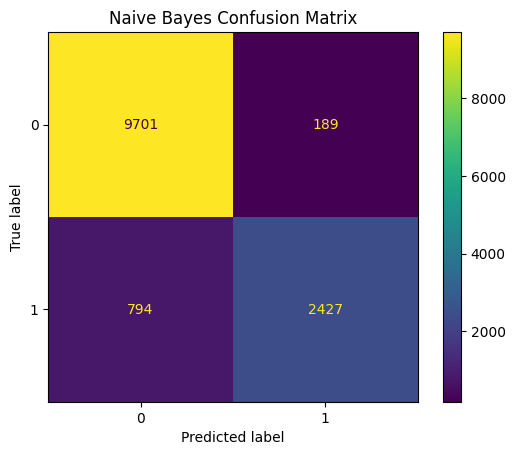

In [6]:
def evaluate_model(name, pipeline):
    """
    Evaluates and displays accuracy, classification report, and confusion matrix for the model.
    """
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Model Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()

for name, pipeline in pipelines.items():
    evaluate_model(name, pipeline)


Best parameters for Decision Tree: {'model__max_depth': None, 'model__min_samples_split': 10}
Best cross-validation accuracy: 0.9953

Tuned Decision Tree Model Accuracy: 0.9962
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9890
           1       0.99      0.99      0.99      3221

    accuracy                           1.00     13111
   macro avg       0.99      1.00      0.99     13111
weighted avg       1.00      1.00      1.00     13111



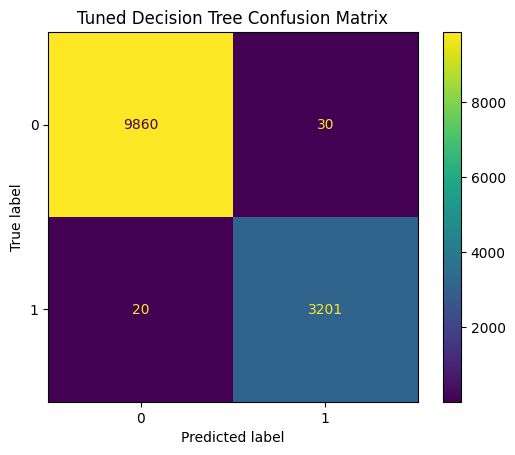

In [7]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(pipelines['Decision Tree'], param_grid=dt_params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"Best parameters for Decision Tree: {grid.best_params_}")
print(f"Best cross-validation accuracy: {grid.best_score_:.4f}")

best_dt_model = grid.best_estimator_
evaluate_model("Tuned Decision Tree", best_dt_model)

In [8]:
import joblib
joblib.dump(best_dt_model, '../outputs/pipeline/model.pkl')
print("Model saved succesfully")

<class 'sklearn.pipeline.Pipeline'>
Model saved successfully
